In [3]:
from datetime import datetime,timedelta,date
import pandas as pd
import numpy as np
import seaborn as sns

from __future__ import division
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

import joblib

import matplotlib.pyplot as plt

import plotly.offline as pyoff
import plotly.graph_objs as go

In [4]:
def evaluate_model(df_new,df_done):
    X = df_new.drop('y',axis='columns')
    y = df_new['y']

    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.1, random_state= 42)

    classifier = DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=25,min_samples_leaf= 5,min_samples_split=2,random_state=42)
    classifier = classifier.fit(X_train,y_train)


    y_pred = classifier.predict(X_test)

    sampledData = df_done.sample(frac=0.1, random_state=42)
    A = sampledData.drop('y',axis='columns')
    B = sampledData['y']

    y_preddd = classifier.predict(A)
    print('=======New data=======')
    print('Accuracy Score:', accuracy_score(y_test,y_pred))
    print('F1 Score:',f1_score(y_test,y_pred))
    print('Recall Score: ',recall_score(y_test,y_pred))
    print('Precision Score: ',precision_score(y_test,y_pred))

    print('=======Old data=======')
    print('Accuracy Score:', accuracy_score(B,y_preddd))
    print('F1 Score:',f1_score(B,y_preddd))
    print('Recall Score: ',recall_score(B,y_preddd))
    print('Precision_score',precision_score(B,y_preddd))

In [5]:
df = pd.read_csv(r"../data/design_data/Raw.csv",sep=';')

In [6]:
convert = {
    "job":{"blue-collar":0,"management":1,"technician":2,"admin.":3,"services":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11},
    "marital":{"married":0,"single":1,"divorced":2},
    "education":{"secondary":0,"tertiary":1,"primary":2,"unknown":3},
    "default":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "loan":{"no":0,"yes":1},
    "contact":{"cellular":0,"unknown":1,"telephone":2},
    "month":{"may":1,"jul":2,"aug":3,"jun":4,"nov":5,"apr":6,"feb":7,"jan":8,"oct":9,"sep":10,"mar":11,"dec":12},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "y":{"no":0,"yes":1}
    
}
df_done = df.replace(convert)
data_done = df_done

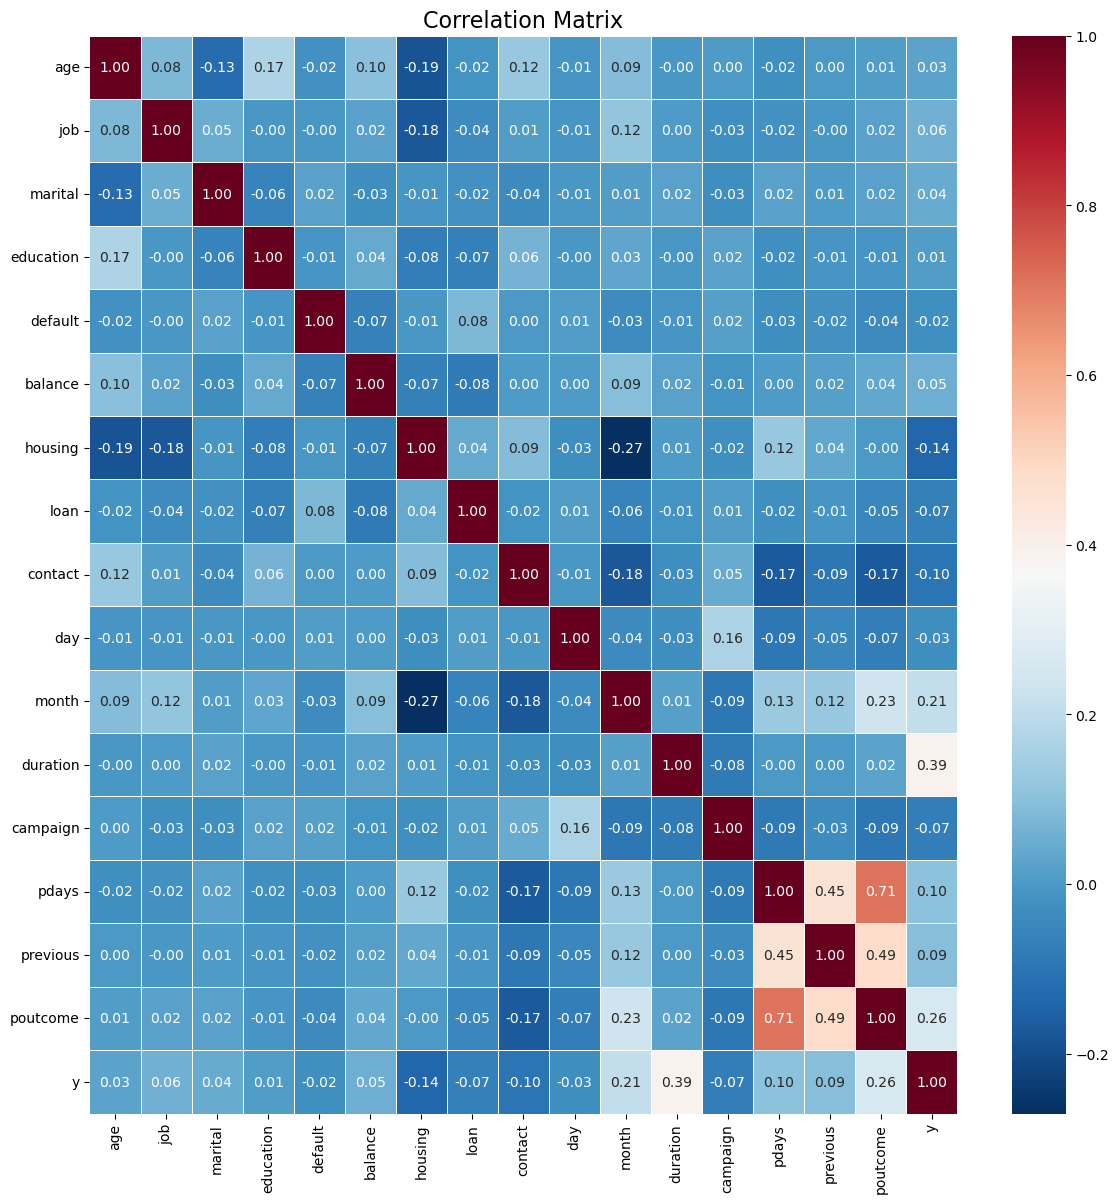

In [7]:
# correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận correlation
corr = df_done.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap='RdBu_r')

plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [8]:
df_done

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,1,0,2143,1,0,1,5,1,261,1,-1,0,0,0
1,44,2,1,0,0,29,1,0,1,5,1,151,1,-1,0,0,0
2,33,7,0,0,0,2,1,1,1,5,1,76,1,-1,0,0,0
3,47,0,0,3,0,1506,1,0,1,5,1,92,1,-1,0,0,0
4,33,11,1,3,0,1,0,0,1,5,1,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,1,0,825,0,0,0,17,5,977,3,-1,0,0,1
45207,71,5,2,2,0,1729,0,0,0,17,5,456,2,-1,0,0,1
45208,72,5,0,0,0,5715,0,0,0,17,5,1127,5,184,3,3,1
45209,57,0,0,0,0,668,0,0,2,17,5,508,4,-1,0,0,0


In [9]:
X = data_done.drop('y',axis='columns')
y = data_done['y']

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Tạo pipeline kết hợp oversampling và undersampling
pipeline = Pipeline([
    ('oversample', RandomOverSampler(sampling_strategy=0.4,random_state=42)),  # Oversampling lớp thiểu số để đạt tỷ lệ 1:2
    ('undersample', RandomUnderSampler(sampling_strategy=0.8,random_state=42)),  # Undersampling lớp đa số để đạt tỷ lệ 4:5
])
#  Áp dụng pipeline cho dữ liệu huấn luyện
X_resampled_1, y_resampled_1 = pipeline.fit_resample(X, y)

In [11]:
df_test_over_under = pd.concat([X_resampled_1,y_resampled_1],axis=1)

In [12]:
#Class count
count_class_0, count_class_1 = df_test_over_under.y.value_counts()
print("Count class 0:",count_class_0)
print("Count class 1:",count_class_1)

Count class 0: 19960
Count class 1: 15968


In [13]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test =  train_test_split(X_resampled_1,y_resampled_1,test_size = 0.1, random_state= 42)

classifier = DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=25,min_samples_leaf= 5,min_samples_split=2,random_state=42)
classifier = classifier.fit(X_train,y_train)


y_pred = classifier.predict(X_test)
filename = 'decisionTree_model_1.plk'

print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))

Accuracy Score: 0.836348455329808
F1 Score: 0.8109324758842443
Recall Score:  0.8125
Precision Score:  0.8093709884467266


AUC Score: 0.8917031713279826


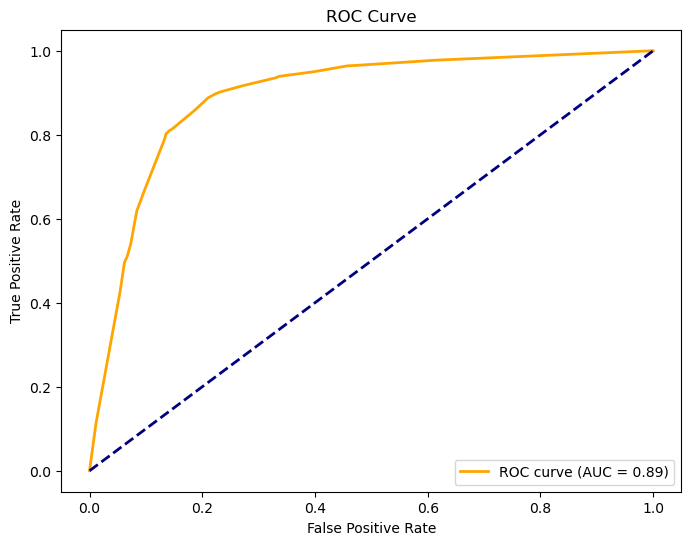

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Confusion matrix, without normalization
[[1744  297]
 [ 291 1261]]
Normalized confusion matrix
[[0.8544831 0.1455169]
 [0.1875    0.8125   ]]


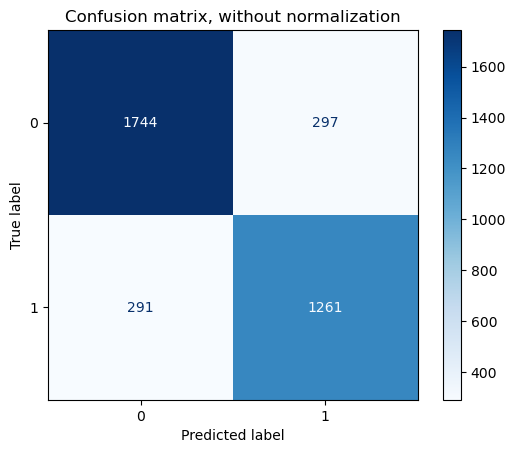

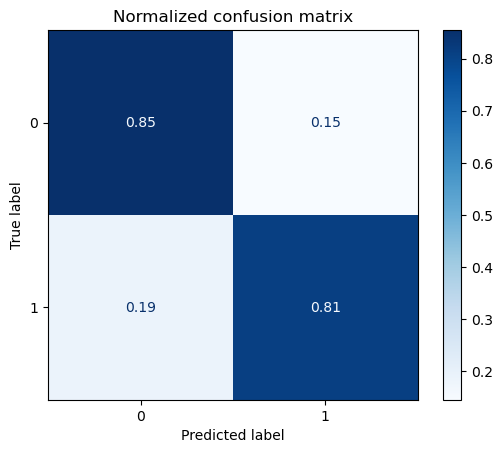

In [15]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=classifier.classes_,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [16]:
sampledData = df_done.sample(frac=0.1, random_state=42)
sampledData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3776,40,0,0,0,0,580,1,0,1,16,1,192,1,-1,0,0,0
9928,47,4,1,0,0,3644,0,0,1,9,4,83,2,-1,0,0,0
33409,25,10,1,1,0,538,1,0,0,20,6,226,1,-1,0,0,0
31885,42,1,0,1,0,1773,0,0,0,9,6,311,1,336,1,1,0
15738,56,1,0,1,0,217,0,1,0,21,2,121,2,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,42,0,2,0,0,685,1,0,1,30,1,204,4,-1,0,0,0
41278,36,1,0,1,0,255,0,0,0,25,3,242,6,95,4,3,1
6808,38,2,0,0,0,61,1,0,1,28,1,97,1,-1,0,0,0
12358,32,3,0,0,0,187,0,1,1,27,4,381,3,-1,0,0,0


In [17]:
sampledData = df_done.sample(frac=0.1, random_state=42)
sampledData
A = sampledData.drop('y',axis='columns')
B = sampledData['y']

y_preddd = classifier.predict(A)
print('Accuracy Score:', accuracy_score(B,y_preddd))
print('F1 Score:',f1_score(B,y_preddd))
print('Recall Score: ',recall_score(B,y_preddd))
print('Precision_score',precision_score(B,y_preddd))

Accuracy Score: 0.840743198407432
F1 Score: 0.5550061804697157
Recall Score:  0.8104693140794224
Precision_score 0.42199248120300753


Giá trị Precision khá thấp, cần phải tăng giá trị Precision lên

duration > 647.5 then class: 1 (proba: 86.2%) | based on 4,269 samples

(duration > 251.5) and (duration <= 503.5) and (housing <= 0.5) and (pdays > 8.5) then class: 1 (proba: 88.72%) | based on 1,409 samples

(duration <= 251.5) and (poutcome > 2.5) then class: 1 (proba: 85.36%) | based on 1,052 samples

(duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome > 2.5) then class: 1 (proba: 92.53%) | based on 241 samples

(duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome <= 2.5) and (contact <= 0.5) and (month > 8.5) then class: 1 (proba: 89.11%) | based on 101 samples


In [18]:
df = df_test_over_under

In [19]:
# Lọc DataFrame để lấy các hàng có 'duration' > 647.5
condition = df['duration'] > 647.5

# Gán giá trị 1 cho cột 'y' ở các hàng thỏa mãn điều kiện
df.loc[condition, 'y'] = 1

In [20]:
df[df['duration']>647.5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5170,34,0,0,2,0,336,1,0,1,21,1,713,4,-1,0,0,1
37178,39,1,0,1,0,141,1,0,0,13,1,788,2,331,6,2,1
6635,30,4,0,3,0,280,1,1,1,28,1,674,2,-1,0,0,1
42024,67,5,0,2,0,2,0,0,0,28,9,1118,1,-1,0,0,1
39359,38,4,2,0,0,710,1,0,0,18,1,1880,2,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55879,29,0,2,0,0,-19,1,0,0,20,6,712,4,-1,0,0,1
55880,53,3,2,3,0,257,0,0,0,11,2,1310,2,-1,0,0,1
55881,38,0,0,2,0,4406,1,0,2,13,1,689,2,-1,0,0,1
55882,50,4,0,0,0,1595,0,0,1,9,4,882,1,-1,0,0,1


In [21]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8797662120790426
F1 Score: 0.8693284936479129
Recall Score:  0.876219512195122
Precision Score:  0.8625450180072028
=======Old data=======
Accuracy Score: 0.8394160583941606
F1 Score: 0.5637019230769231
Recall Score:  0.8465703971119134
Precision_score 0.42252252252252254


In [22]:
df = df_test_over_under

In [23]:
condition = (
    (df['duration'] > 251.5) & 
    (df['duration'] <= 503.5) & 
    (df['housing'] <= 0.5) & 
    (df['pdays'] > 8.5)
)

# Gán giá trị 1 cho cột 'y' ở các hàng thỏa mãn điều kiện
df.loc[condition, 'y'] = 1

In [24]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8750347898691901
F1 Score: 0.868444184002344
Recall Score:  0.8916967509025271
Precision Score:  0.8463735008566533
=======Old data=======
Accuracy Score: 0.8175182481751825
F1 Score: 0.5419211549139367
Recall Score:  0.8808664259927798
Precision_score 0.3913392141138733


In [25]:
df = df_test_over_under

2 rule có chỉ số cao nhất

(duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome > 2.5) then class: 1 (proba: 92.53%) | based on 241 samples

(duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome <= 2.5) and (contact <= 0.5) and (month > 8.5) then class: 1 (proba: 89.11%) | based on 101 samples

In [26]:
# Điều kiện đầu tiên: (duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome > 2.5)
condition_1 = (df['duration'] > 251.5) & (df['duration'] <= 503.5) & (df['housing'] > 0.5) & (df['poutcome'] > 2.5)

# Điều kiện thứ hai: (duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome <= 2.5) and (contact <= 0.5) and (month > 8.5)
condition_2 = (df['duration'] > 251.5) & (df['duration'] <= 503.5) & (df['housing'] > 0.5) & (df['poutcome'] <= 2.5) & (df['contact'] <= 0.5) & (df['month'] > 8.5)

# Gán giá trị 1 cho cột y khi các điều kiện được thỏa mãn
df.loc[condition_1 | condition_2, 'y'] = 1

In [27]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8736431951015864
F1 Score: 0.867096018735363
Recall Score:  0.8884223155368927
Precision Score:  0.8467695826186392
=======Old data=======
Accuracy Score: 0.8126520681265207
F1 Score: 0.5353812397147559
Recall Score:  0.8808664259927798
Precision_score 0.38455476753349094


(poutcome <= 2.5) and (month <= 5.5) and (duration <= 154.5) then class: 0 (proba: 96.12%) | based on 5,959 samples

(154.5 < duration <= 251.5) and (poutcome <= 2.5) and (month <= 5.5) and (housing > 0.5) then class: 0 (proba: 92.48%) | based on 1,967 samples

(154.5< duration <= 251.5) and (poutcome <= 2.5) and (month <= 5.5) and (housing <= 0.5) and (pdays <= 13.5) and (29.5 < age <= 60.5) and (day > 4.5) then class: 0 (proba: 85.15%) | based on 1,064 samples

(503.5 > duration > 251.5) and (housing > 0.5) and (poutcome <= 2.5) and (contact > 0.5) then class: 0 (proba: 90.71%) | based on 980 samples

(103.5 <= duration <= 251.5) and (poutcome <= 2.5) and (8.5 >= month > 5.5) and (housing <= 0.5) then class: 0 (proba: 85.87%) | based on 276 samples

In [28]:
df = df_test_over_under

In [29]:
# Điều kiện đầu tiên: (duration > 251.5) and (duration <= 503.5) and (housing > 0.5) and (poutcome > 2.5)
condition_1 = (df['duration'] <154.5)  & (df['poutcome'] <= 2.5) & (df['month'] <= 5.5)

# Gán giá trị 1 cho cột y khi các điều kiện được thỏa mãn
df.loc[condition_1 , 'y'] = 0

In [30]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8839409963818536
F1 Score: 0.8754852194684981
Recall Score:  0.8982843137254902
Precision Score:  0.8538147932440303
=======Old data=======
Accuracy Score: 0.8080070780800708
F1 Score: 0.5241228070175439
Recall Score:  0.8628158844765343
Precision_score 0.3763779527559055


In [31]:
df = df_test_over_under

In [32]:
# Định nghĩa 5 điều kiện mà bạn đã liệt kê
condition1 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] <= 5.5) & (df['duration'] <= 154.5)
condition2 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] <= 5.5) & (df['duration'] > 154.5) & (df['housing'] > 0.5)
condition3 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] <= 5.5) & (df['duration'] > 154.5) & (df['housing'] <= 0.5) & (df['pdays'] <= 13.5) & (df['age'] > 29.5) & (df['age'] <= 60.5) & (df['day'] > 4.5)
condition4 = (df['duration'] > 251.5) & (df['duration'] <= 503.5) & (df['housing'] > 0.5) & (df['poutcome'] <= 2.5) & (df['contact'] > 0.5)
condition5 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] > 5.5) & (df['month'] <= 8.5) & (df['housing'] <= 0.5) & (df['duration'] <= 103.5)

# Kết hợp tất cả 5 điều kiện lại để tạo ra một mặt nạ (mask)
mask = condition1 | condition2 | condition3 | condition4 | condition5

# Sử dụng mặt nạ để thay đổi giá trị cột y thành 0 đối với các hàng thỏa mãn điều kiện
df.loc[mask, 'y'] = 0

In [33]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8928472028945171
F1 Score: 0.8857905665974488
Recall Score:  0.9497455470737913
Precision Score:  0.8299055030572541
=======Old data=======
Accuracy Score: 0.7958416279584163
F1 Score: 0.5154855643044619
Recall Score:  0.8862815884476535
Precision_score 0.3634344929681717


In [34]:
df = df_test_over_under

In [36]:
condition2 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] <= 5.5) & (df['duration'] > 154.5) & (df['housing'] > 0.5)

# Kết hợp tất cả 5 điều kiện lại để tạo ra một mặt nạ (mask)
mask = condition2 
# Sử dụng mặt nạ để thay đổi giá trị cột y thành 0 đối với các hàng thỏa mãn điều kiện
df.loc[mask, 'y'] = 0

In [37]:
evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8928472028945171
F1 Score: 0.8857905665974488
Recall Score:  0.9497455470737913
Precision Score:  0.8299055030572541
=======Old data=======
Accuracy Score: 0.7958416279584163
F1 Score: 0.5154855643044619
Recall Score:  0.8862815884476535
Precision_score 0.3634344929681717


In [38]:
df = df_test_over_under

condition5 = (df['duration'] <= 251.5) & (df['poutcome'] <= 2.5) & (df['month'] > 5.5) & (df['month'] <= 8.5) & (df['housing'] <= 0.5) & (df['duration'] <= 103.5)

mask = condition2 
# Sử dụng mặt nạ để thay đổi giá trị cột y thành 0 đối với các hàng thỏa mãn điều kiện
df.loc[mask, 'y'] = 0

evaluate_model(df,df_done)

=======New data=======
Accuracy Score: 0.8928472028945171
F1 Score: 0.8857905665974488
Recall Score:  0.9497455470737913
Precision Score:  0.8299055030572541
=======Old data=======
Accuracy Score: 0.7958416279584163
F1 Score: 0.5154855643044619
Recall Score:  0.8862815884476535
Precision_score 0.3634344929681717
